<a href="https://colab.research.google.com/github/Arnimaaaa/online-summer-training-on-machine-learning/blob/main/task13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Exploratory Data Analysis (EDA) of Titanic Survival Problem.

In [12]:
from google.colab import files
data_to_load = files.upload()

Saving tested.csv to tested.csv


In [14]:
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(data_to_load['tested.csv']))

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
train_data=pd.read_csv('tested.csv')
test_data=pd.read_csv('tested.csv')
train_data.shape

(418, 12)

In [17]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [18]:
test_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [19]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

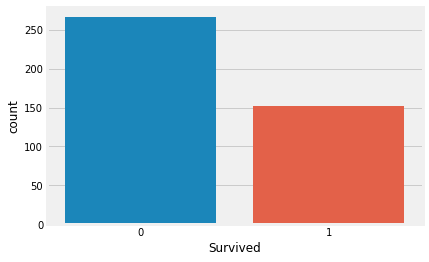

In [20]:
sb.countplot('Survived',data=train_data)
plt.show()

In [21]:
train_data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  1           152
male    0           266
Name: Survived, dtype: int64

The survival ratio of female is much greater than that of male. It can be seen clearly in following graph


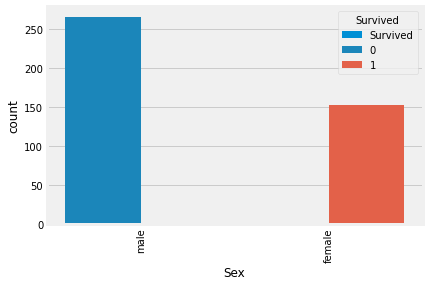

In [22]:
train_data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()
sb.countplot('Sex',hue='Survived',data=train_data,)
plt.show()

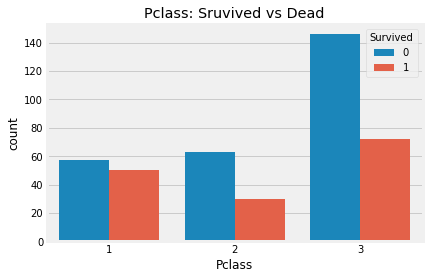

In [23]:
sb.countplot('Pclass', hue='Survived', data=train_data)
plt.title('Pclass: Sruvived vs Dead')
plt.show()

some more observations

In [24]:
pd.crosstab([train_data.Sex,train_data.Survived],train_data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

,Pclass,1,2,3,All
Sex,Survived,,,,
female,1,50,30,72,152
male,0,57,63,146,266
All,,107,93,218,418


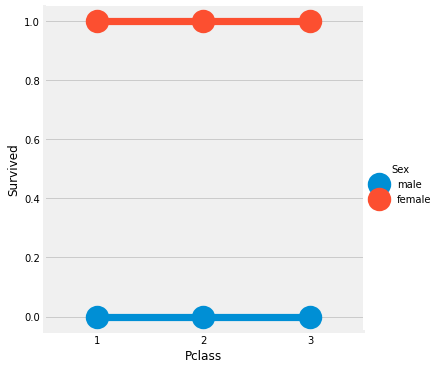

In [25]:
sb.factorplot('Pclass', 'Survived', hue='Sex', data=train_data)
plt.show()

In [26]:
print('Oldest person Survived was of:',train_data['Age'].max())
print('Youngest person Survived was of:',train_data['Age'].min())
print('Average person Survived was of:',train_data['Age'].mean())

Oldest person Survived was of: 76.0
Youngest person Survived was of: 0.17
Average person Survived was of: 30.272590361445783


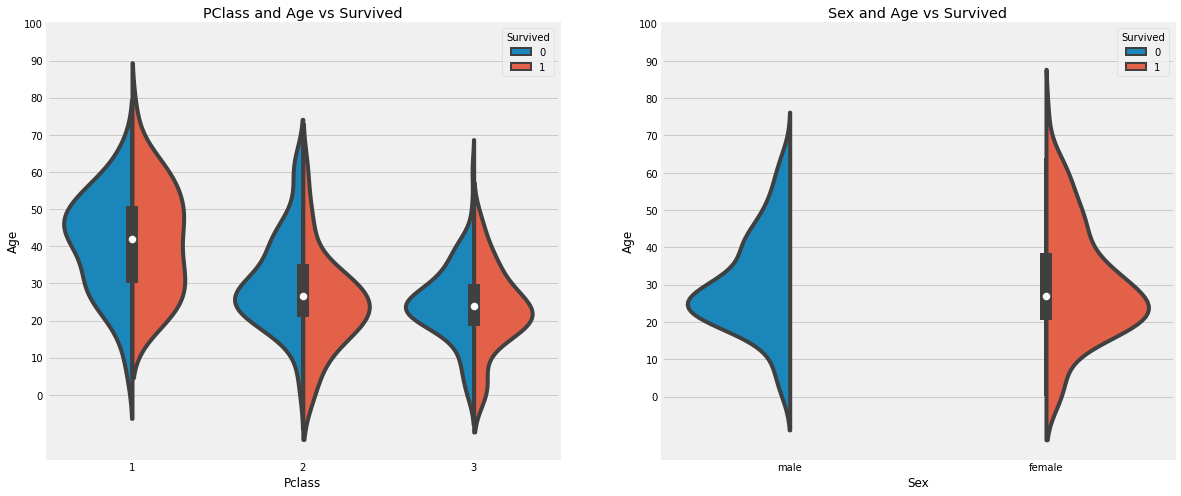

In [28]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sb.violinplot('Pclass','Age',hue='Survived',data=train_data,split=True,ax=ax[0])
ax[0].set_title('PClass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sb.violinplot("Sex","Age", hue="Survived", data=train_data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

In [29]:
train_data['Initial']=0
for i in train_data:
    train_data['Initial']=train_data.Name.str.extract('([A-Za-z]+)\.') 
pd.crosstab(train_data.Initial,train_data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Col,Dona,Dr,Master,Miss,Mr,Mrs,Ms,Rev
Sex,,,,,,,,,
female,0,1,0,0,78,0,72,1,0
male,2,0,1,21,0,240,0,0,2


replacing Mr, Mrs etc with some relevant names

In [30]:
train_data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess',
                               'Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss',
                                'Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)
train_data.groupby('Initial')['Age'].mean()

Initial
Dona      39.000000
Master     7.406471
Miss      21.774844
Mr        32.114130
Mrs       38.903226
Other     42.750000
Name: Age, dtype: float64

In [31]:
train_data.loc[(train_data.Age.isnull()) & (train_data.Initial=='Mr'),'Age']=33
train_data.loc[(train_data.Age.isnull()) & (train_data.Initial=='Mrs'),'Age']=36
train_data.loc[(train_data.Age.isnull()) & (train_data.Initial=='Master'),'Age']=5
train_data.loc[(train_data.Age.isnull()) & (train_data.Initial=='Miss'),'Age']=22
train_data.loc[(train_data.Age.isnull()) & (train_data.Initial=='Other'),'Age']=46
train_data.Age.isnull().any()

False

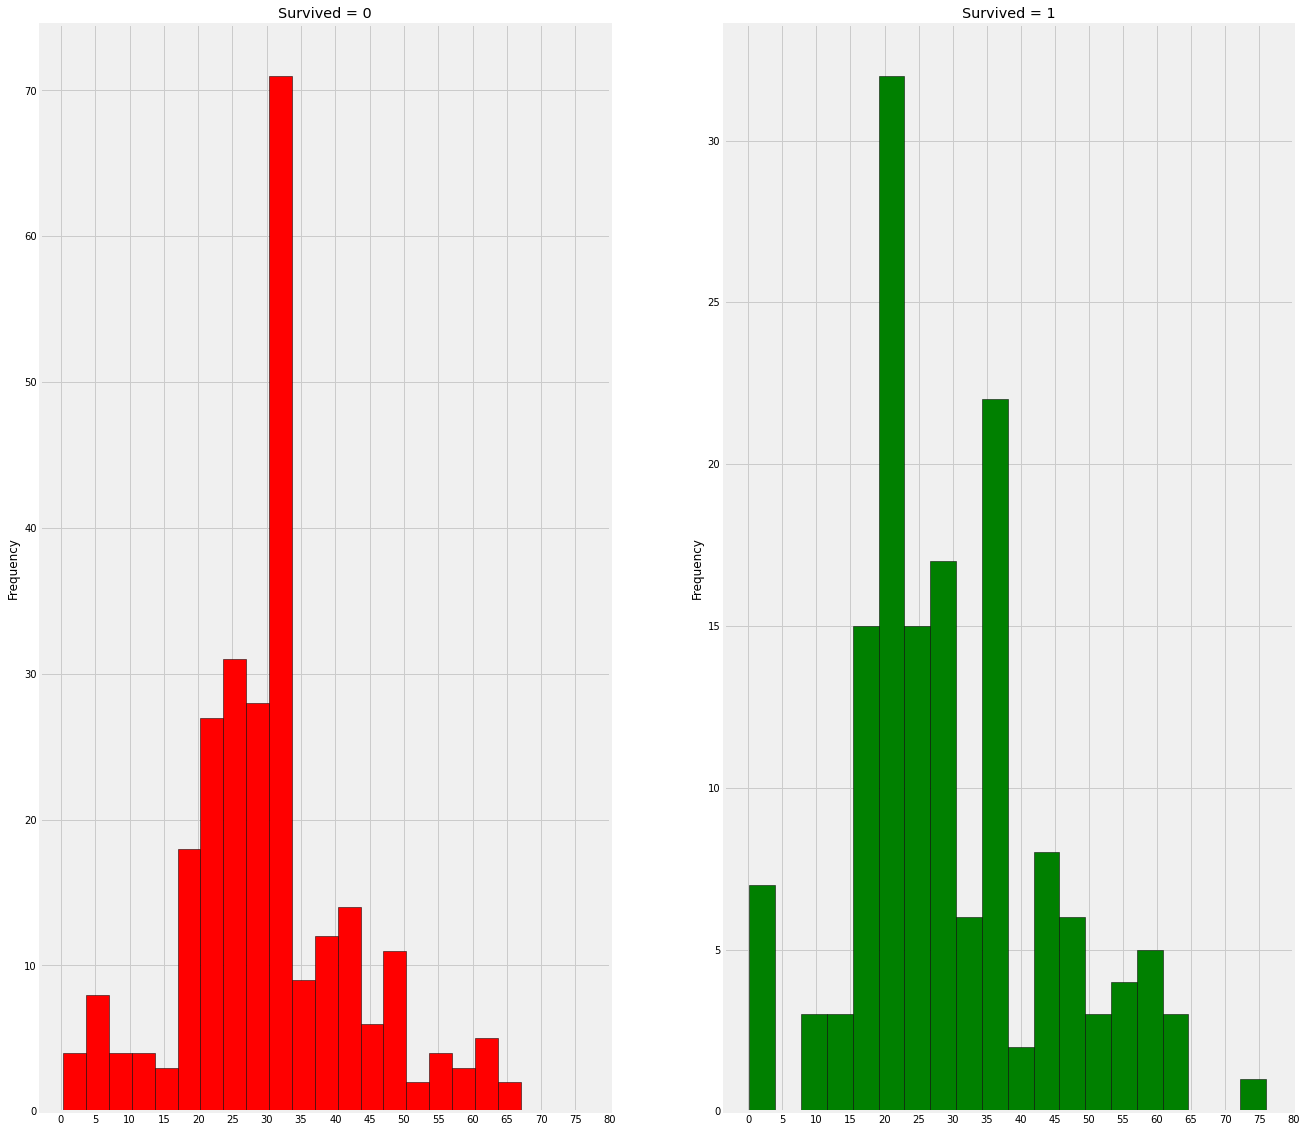

In [32]:
f,ax=plt.subplots(1,2,figsize=(20,20))
train_data[train_data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived = 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
train_data[train_data['Survived']==1].Age.plot.hist(ax=ax[1],bins=20,edgecolor='black',color='green')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
ax[1].set_title('Survived = 1')
plt.show()

OBSERVATION: First priority during Rescue is given to children and women, as the persons<5 are save by large numbers,The oldest saved passanger is of 80 and The most deaths were between 30-40

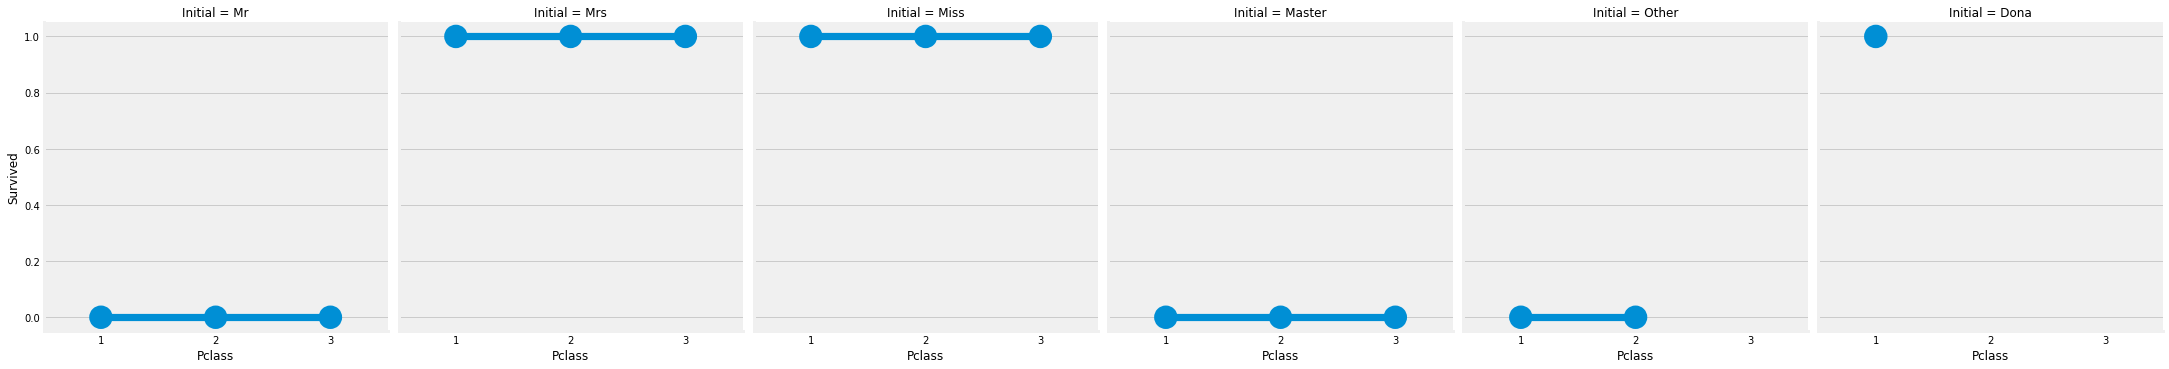

In [33]:
sb.factorplot('Pclass','Survived',col='Initial',data=train_data)
plt.show()

SibSip feature indicates that whether a person is alone or with his family. Siblings=brother,sister, etc and Spouse= husband,wife

In [34]:
pd.crosstab([train_data.SibSp],train_data.Survived).style.background_gradient('summer_r')

Survived,0,1
SibSp,,
0,195,88
1,56,54
2,8,6
3,3,1
4,3,1
5,0,1
8,1,1


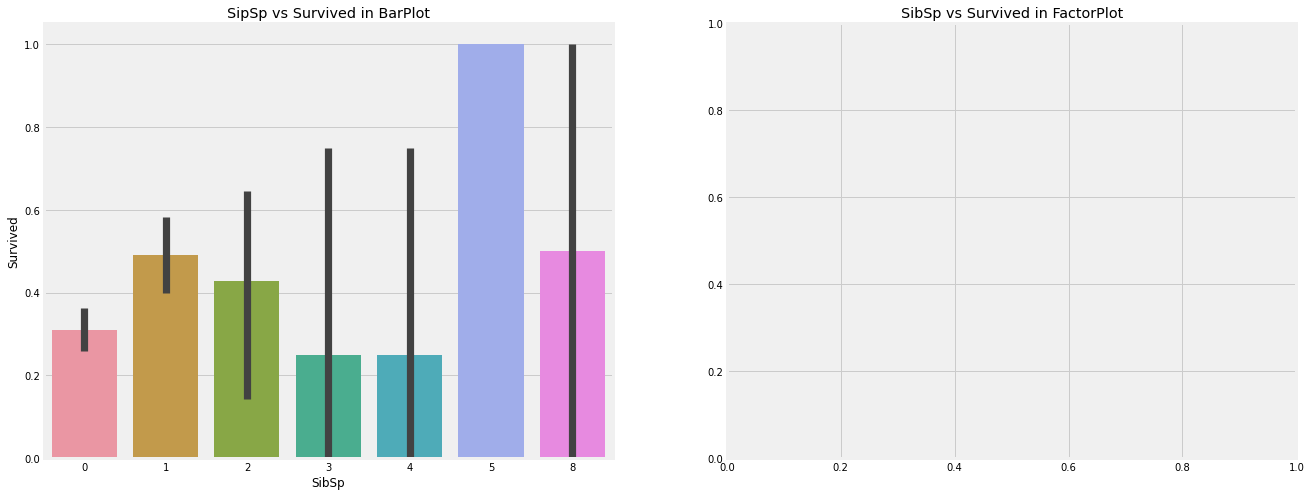

In [35]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sb.barplot('SibSp','Survived', data=train_data,ax=ax[0])
ax[0].set_title('SipSp vs Survived in BarPlot')
sb.factorplot('SibSp','Survived', data=train_data,ax=ax[1])
ax[1].set_title('SibSp vs Survived in FactorPlot')
plt.close(2)
plt.show()

In [36]:
pd.crosstab(train_data.SibSp,train_data.Pclass).style.background_gradient('summer_r')

Pclass,1,2,3
SibSp,,,
0,61,62,160
1,42,27,41
2,3,4,7
3,1,0,3
4,0,0,4
5,0,0,1
8,0,0,2
